# Employee Churn Predictor Using Machine Learning

#### Employee Churn or Attrition is the overall turnover in an organization's staff as existing employees leave and new ones are hired. It can be abrupt, sudden and sometimes highly drastic.

Employee Churn has a number of disadvantages to the company like:

* Decreased Overall Performance.
* Difficulty in managing daily tasks .
* Increased Costs of paying previous employees and hiring new ones.
* Loss of experienced employees.
* High attrition rate has negative impact on company image.
* Time and money wasted on trained employees who leave.

In this project, I have taken the HR dataset from kaggle. 
The file has information about the employees of a company. The data is about:
1. satisfaction_level: It is employee satisfaction point, which ranges from 0-1.
2. last_evaluation: It is evaluated performance by the employer, which also ranges from 0-1.
3. number_projects: How many numbers of projects assigned to an employee?
4. average_monthly_hours: How many average numbers of hours worked by an employee in a month?
5. time_spent_company: time_spent_company means employee experience. The number of years spent by an employee in the company.
6. work_accident: Whether an employee has had a work accident or not.
7. promotion_last_5years: Whether an employee has had a promotion in the last 5 years or not.
8. Departments: Employee's working department/division.
9. Salary: Salary level of the employee such as low, medium and high.
10. left: Whether the employee has left the company or not.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [3]:
data = pd.read_csv('HR_comma_sep.csv')
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### The graph below shows the ratio of employees that left versus stayed

[Text(0,0.5,'Employees Stayed and Left'), Text(0.5,0,'Number of Employees')]

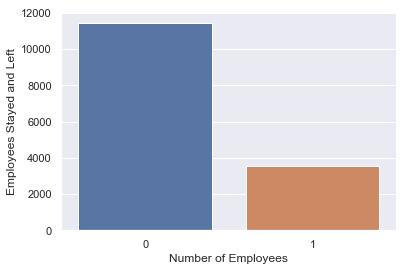

In [4]:
left_count=data.groupby('left').count()
sns.set(font_scale=1)
ax = sns.barplot(left_count.index.values, left_count['satisfaction_level'])
ax.set(xlabel = 'Number of Employees', ylabel = 'Employees Stayed and Left')

### Data Visualization of All Employees

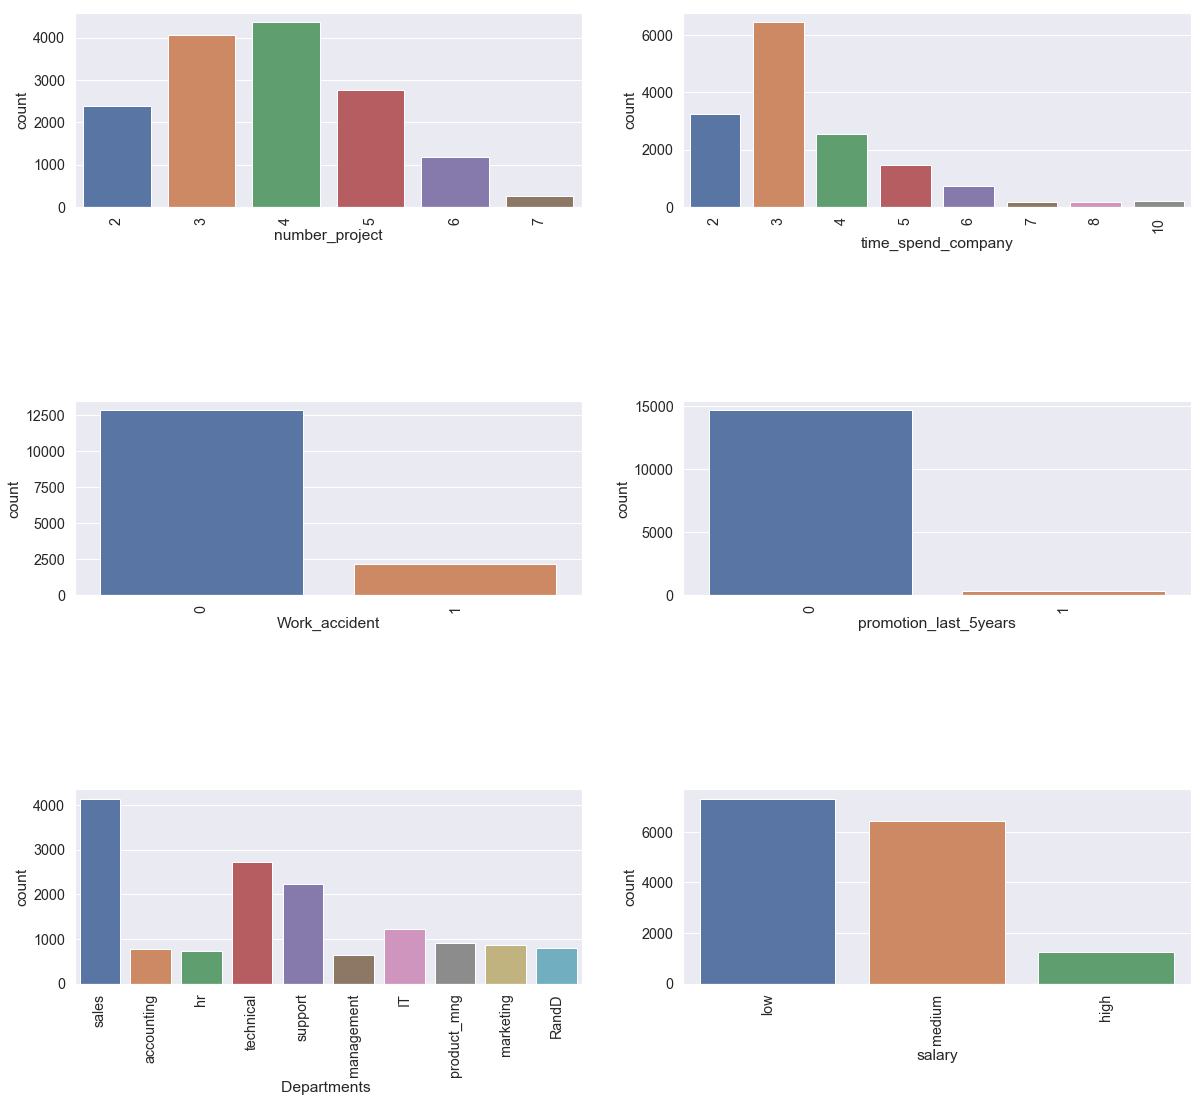

In [5]:
features=['number_project','time_spend_company','Work_accident', 'promotion_last_5years','Departments ','salary']
fig=plt.subplots(figsize=(20,25))
for i, j in enumerate(features):
    sns.set(font_scale=1.3)
    plt.subplot(4, 2, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(x=j,data = data)
    plt.xticks(rotation=90)
    #plt.title("No. of employee")

#### We can observe the following points in the above visualization:

* Most employees work on 3-5 projects.
* There is a huge drop between an experience of 3 and 4 years.
* 23% of the total employees left the company.
* Very few employees have been promoted in the last 5 years.
* The sales department has the maximum no.of employees followed by technical and support.
* Most of the employees have medium or low salaries.

### Data Visualization of Employees who Left

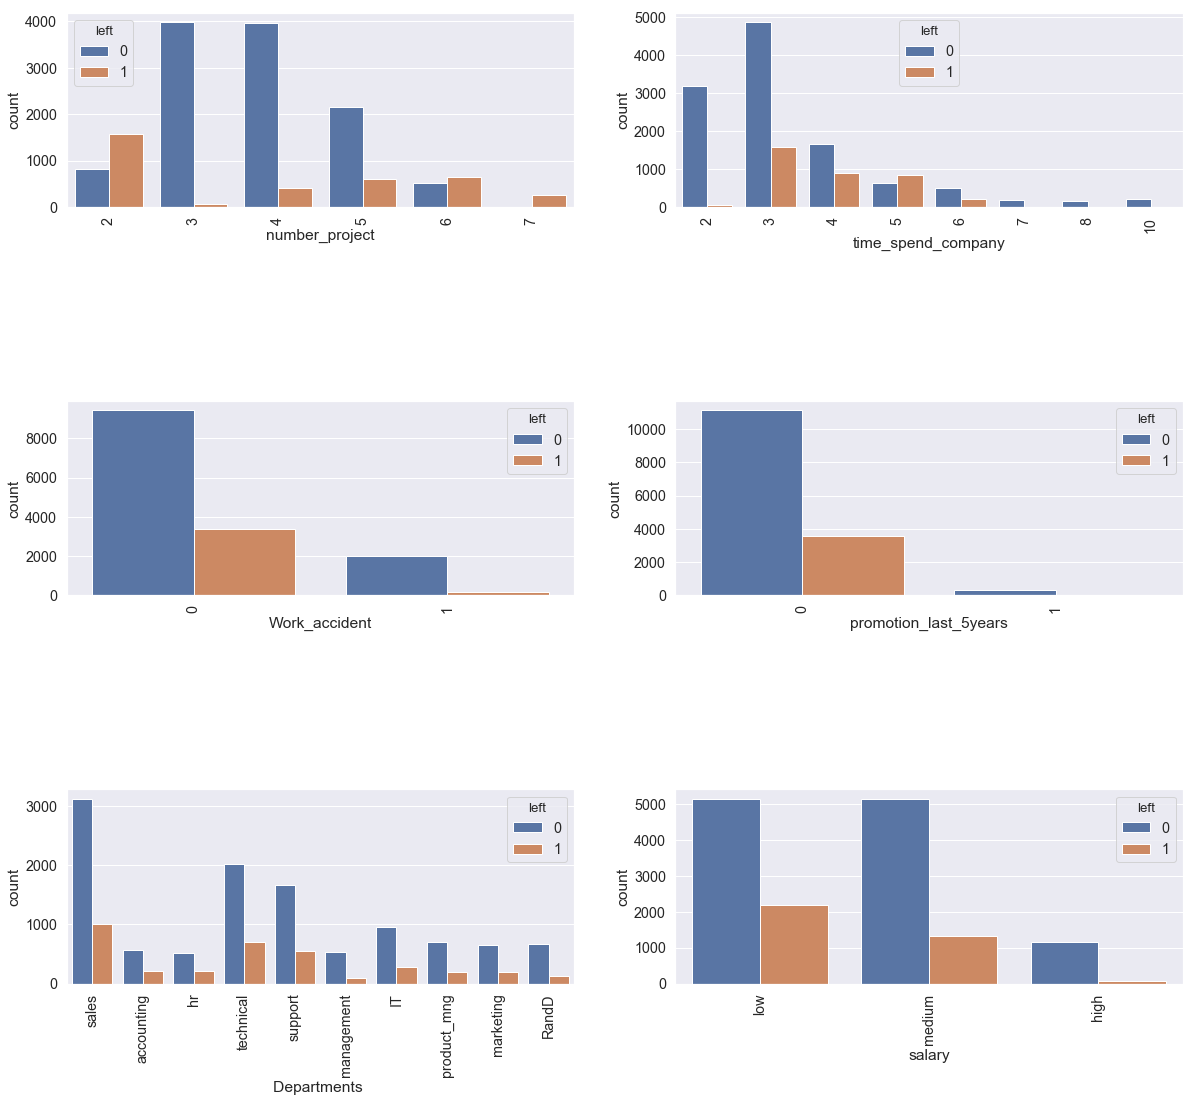

In [6]:
fig=plt.subplots(figsize=(20,25))
for i, j in enumerate(features):
    sns.set(font_scale=1.3)
    plt.subplot(4, 2, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(x=j,data = data, hue='left')
    plt.xticks(rotation=90)
   # plt.title("No. of employees")

We can observe the following points in the above visualization:

* Employees with >5 projects left the company.
* Employees with 5 year experience leave due to lack of promotions, whereas 6 year experience are loyal to the company.
* None of the employees who were promoted in the last 5 years left the company.

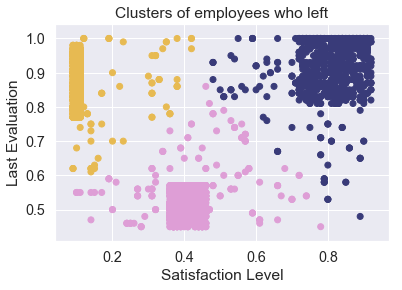

In [7]:
left_emp =  data[['satisfaction_level', 'last_evaluation']][data.left == 1]
# Create groups using K-means clustering.
kmeans = KMeans(n_clusters = 3, random_state = 0).fit(left_emp)
left_emp['label'] = kmeans.labels_
# Draw scatter plot
plt.scatter(left_emp['satisfaction_level'], left_emp['last_evaluation'], c=left_emp['label'], cmap='tab20b')
plt.xlabel('Satisfaction Level')
plt.ylabel('Last Evaluation')
plt.title('Clusters of employees who left')
plt.show()

Here, Employees who left the company can be grouped into 3 types:

* High Satisfaction and High Evaluation(Blue), they are the creamy layer.
* Low Satisfaction and High Evaluation(Yellow), they are frustrated.
* Moderate Satisfaction and Moderate Evaluation (Pink), they are below average.

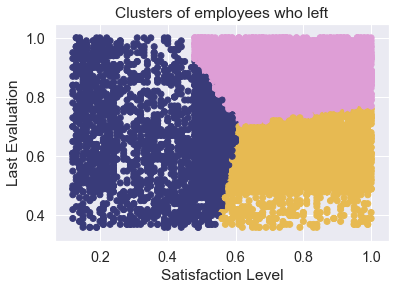

In [21]:
left_emp =  data[['satisfaction_level', 'last_evaluation']][data.left == 0]
# Create groups using K-means clustering.
kmeans = KMeans(n_clusters = 3, random_state = 0).fit(left_emp)
left_emp['label'] = kmeans.labels_
# Draw scatter plot
plt.scatter(left_emp['satisfaction_level'], left_emp['last_evaluation'], c=left_emp['label'], cmap='tab20b')
plt.xlabel('Satisfaction Level')
plt.ylabel('Last Evaluation')
plt.title('Clusters of employees who left')
plt.show()

In [9]:
#creating labelEncoder
le = preprocessing.LabelEncoder()
# Converting string labels into numbers.
data['salary']=le.fit_transform(data['salary'])
data['Departments ']=le.fit_transform(data['Departments '])

## Building a Prediction Model

#### To understand the model performance, we divide the data into training and test data

In [10]:
X=data[['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'Departments ', 'salary']]
y=data['left']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### Here we use the GradientBoostingClassifier Model to make predictions

In [11]:
from sklearn.ensemble import GradientBoostingClassifier

#Create Gradient Boosting Classifier
gb = GradientBoostingClassifier()

#Train the model using the training sets
gb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gb.predict(X_test)

E:\Anaconda\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [12]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
# Model Precision
print("Precision:",metrics.precision_score(y_test, y_pred))
# Model Recall
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.9715555555555555
Precision: 0.958252427184466
Recall: 0.9207089552238806


* Here we can see that the classification accuracy of the model is 97%. 
* 96% of the predictions will turn out to be true. 

In [13]:
export = data.to_csv('export.csv',index=None)

In [14]:
df = pd.read_excel('a1.xlsx')

In [15]:
tes = df[['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'Departments ', 'salary']]

In [16]:
predd = gb.predict(tes)
predd

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

Here I have used the Gradient Booster Classifier. We can use different algorithms depending upon the data available.
The accuracy of the models depends on the nature and imbalance in the data provided.
Some other options are:
* Logistic Regression 
* Random Forest
* SVM (Suport Vector Machine)
* KNN (K Nearest Neighbour)
* Decision Tree Classifier
* Gaussian NB.

The aspects considered in this dataset are all push factors (factors from within the company). We can also consider external pull factors like job demand, rival salaries etc.

We can also consider more factors like Gender, Distance from home, Manager etc.